In [1]:
import pickle
import pandas as pd

with open("./kbo_player.pkl", "rb") as f:
    data = pickle.load(f)
    
kbo = pd.DataFrame(data)

In [8]:
import numpy as np
kbo.loc[kbo['연봉'].apply(lambda x : len(x) < 5 ), '연봉'] = np.nan

In [12]:
kbo2 = kbo.loc[kbo.연봉.notnull()].copy()

In [15]:
kbo2.isnull().sum().sum()

0

In [22]:
import dbconnect
cur, con = dbconnect.connection(host="encore.cluster-cd9ecw5piy57.ap-northeast-2.rds.amazonaws.com",
                     user='admin', password='newjeans', db='encore')

In [34]:
cur.execute("""SELECT * FROM exchange
                WHERE ex_date = '2021-12-31' 
                AND currency = 'usd'
                AND sanda_panda = 1""")
value = cur.fetchall()
value[0][1]

1

In [42]:
value[0][1] * 10000

11696700.0

In [46]:
kbo2[kbo2.연봉.apply(lambda x :  x[-2:] == '달러')]['연봉'].apply(lambda x : int(x[:-2]) * value[0][1] / 10000).describe()

count        30.000000
mean      79617.035178
std       37992.837481
min       32165.925000
25%       55446.802746
50%       70180.200000
75%       86263.162500
max      187147.200000
Name: 연봉, dtype: float64

In [50]:
kbo2.loc[kbo2.연봉.apply(lambda x :  x[-2:] == '달러'), '연봉(원화)'] = kbo2.loc[kbo2.연봉.apply(lambda x :  x[-2:] == '달러')]['연봉'].apply(lambda x : int(int(x[:-2]) * value[0][1] / 10000))

In [54]:
kbo2.loc[kbo2['연봉(원화)'].isnull(), '연봉(원화)'] = kbo2.loc[kbo2['연봉(원화)'].isnull()]['연봉'].apply(lambda x : int(x[:-2]))

In [58]:
kbo2.shape

(827, 12)

In [62]:
print("{:,}".format(kbo2['연봉(원화)'].sum()))

12,052,016.0


In [64]:
kbo2.loc[kbo2['Team'] == "고양 히어로즈", 'Team'] = "키움 히어로즈"

In [72]:
kbo2.groupby(['Team'])[['연봉(원화)']].mean().sort_values('연봉(원화)', ascending=False)

,연봉(원화)
Team,
SSG 랜더스,32061.804878
삼성 라이온즈,16735.237500
NC 다이노스,15750.325301
두산 베어스,14216.241379
LG 트윈스,12700.370787
KT 위즈,11987.674699
KIA 타이거즈,11551.321429
롯데 자이언츠,10897.363636
키움 히어로즈,10705.202532


In [76]:
kbo2.groupby(['Team'])[['연봉(원화)']].agg(['mean', 'median', 'std', 'count'])

연봉(원화)                             
                  mean  median            std count
Team                                               
KIA 타이거즈  11551.321429  3600.0   26509.906079    84
KT 위즈     11987.674699  3300.0   18558.757015    83
LG 트윈스    12700.370787  4000.0   22476.603587    89
NC 다이노스   15750.325301  3200.0   35140.219826    83
SSG 랜더스   32061.804878  3200.0  100749.708229    82
두산 베어스    14216.241379  3300.0   29719.572999    87
롯데 자이언츠   10897.363636  3400.0   19056.988257    77
삼성 라이온즈   16735.237500  4000.0   37797.651694    80
키움 히어로즈   10705.202532  3500.0   18009.467582    79
한화 이글스     9151.927711  3200.0   18294.627689    83

In [83]:
kbo2[kbo2.Team == "KT 위즈"].sort_values('연봉(원화)')

,선수명,등번호,생년월일,포지션,신장/체중,경력,입단 계약금,연봉,지명순위,입단년도,Team,연봉(원화)
609,박시윤,No.67,1999년 03월 08일,투수(좌투좌타),185cm/90kg,울산대현초-마산제일중-용마고,9000만원,2700만원,18 KT 2차 3라운드 21순위,18KT,KT 위즈,2700.0
643,전진영,No.96,1998년 04월 30일,외야수(우투좌타),177cm/77kg,영일초-영남중-성남고-경희대,,2700만원,21 KT 육성선수,,KT 위즈,2700.0
639,임도혁,No.56,1997년 10월 09일,투수(우투우타),184cm/74kg,효제초-신흥중-제물포고,6000만원,2700만원,16 KT 2차 4라운드 40순위,,KT 위즈,2700.0
586,김대현,No.98,1998년 01월 13일,내야수(우투우타),183cm/86kg,서울이수초-서울이수중-장충고-홍익대,,2700만원,21 KT 육성선수,,KT 위즈,2700.0
611,박주현,No.99,1999년 08월 03일,투수(좌투좌타),184cm/83kg,철산초-영동중-충암고,5000만원,2700만원,18 KT 2차 8라운드 71순위,18KT,KT 위즈,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
580,강백호,No.50,1999년 07월 29일,내야수(우투좌타),184cm/98kg,부천북초-서울이수중-서울고,45000만원,55000만원,18 KT 2차 1라운드 1순위,18KT,KT 위즈,55000.0
607,박병호,No.52,1986년 07월 10일,내야수(우투우타),185cm/107kg,영일초(광명리틀)-영남중-성남고-LG-상무-LG-히어로즈-미네소타-넥센-키움,33000만원,60000만원,05 LG 1차,05LG,KT 위즈,60000.0
601,라모스,No.25,1992년 04월 15일,외야수(우투양타),183cm/97kg,푸에르토리코 Alfonso Casta Martinez(고),100000달러,650000달러,22 KT 자유선발,22KT,KT 위즈,76028.0
600,데스파이네,No.40,1987년 04월 04일,투수(우투우타),182cm/92kg,미국 Hermanos Martinez Tamayo(고),300000달러,700000달러,20 KT 자유선발,20KT,KT 위즈,81876.0


In [81]:
kbo2.sort_values('연봉(원화)', ascending=False).groupby(['Team']).first()

,선수명,등번호,생년월일,포지션,신장/체중,경력,입단 계약금,연봉,지명순위,입단년도,연봉(원화)
Team,,,,,,,,,,,
KIA 타이거즈,나성범,No.47,1989년 10월 03일,외야수(좌투좌타),183cm/100kg,광주대성초-진흥중-진흥고-연세대-NC,30000만원,200000만원,12 NC 2라운드 10순위,12NC,200000.0
KT 위즈,쿠에바스,No.32,1990년 10월 14일,투수(우투양타),188cm/98kg,베네수엘라 Universidad De Carabobo(대),250000달러,800000달러,19 KT 자유선발,19KT,93573.0
LG 트윈스,김현수,No.22,1988년 01월 12일,외야수(우투좌타),188cm/100kg,쌍문초-신일중-신일고-두산-볼티모어-필라델피아,,150000만원,06 두산 육성선수,06두산,150000.0
NC 다이노스,박건우,No.37,1990년 09월 08일,외야수(우투우타),184cm/80kg,역삼초-서울이수중-서울고-두산-경찰-두산,10000만원,190000만원,09 두산 2차 2라운드 10순위,09두산,190000.0
SSG 랜더스,김광현,No.29,1988년 07월 22일,투수(좌투좌타),188cm/98kg,덕성초(안산리틀)-안산중앙중-안산공고-SK-세인트루이스,50000만원,810000만원,07 SK 1차,07SK,810000.0
두산 베어스,미란다,No.57,1989년 01월 10일,투수(좌투좌타),188cm/86kg,쿠바,150000달러,1600000달러,21 두산 자유선발,21두산,187147.0
롯데 자이언츠,안치홍,No.13,1990년 07월 02일,내야수(우투우타),178cm/97kg,구지초(구리리틀)-대치중-서울고-KIA-경찰-KIA,18000만원,100000만원,09 KIA 2차 1라운드 1순위,09KIA,100000.0
삼성 라이온즈,구자욱,No.5,1993년 02월 12일,외야수(우투좌타),189cm/75kg,본리초-경복중-대구고-삼성-상무,13000만원,250000만원,12 삼성 2라운드 12순위,12삼성,250000.0
키움 히어로즈,요키시,No.43,1989년 07월 29일,투수(좌투우타),188cm/93kg,미국 Northwestern(대),,900000달러,19 키움 자유선발,19키움,105270.0


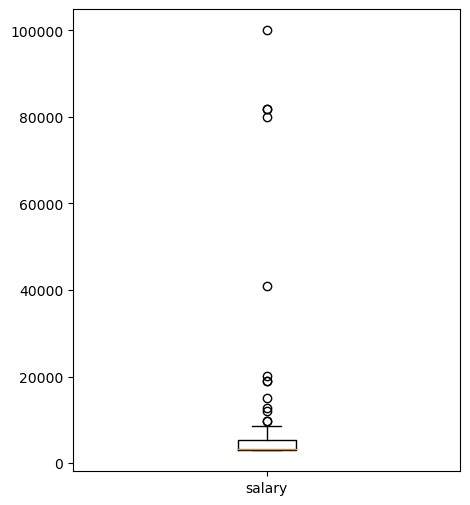

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(kbo2[kbo2.Team == "한화 이글스"]['연봉(원화)'], labels=['salary'])

plt.show()